In [36]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [37]:
digit = pd.read_csv("train.csv")

In [38]:
# about the dataset

# dimensions
print("Dimensions: ", digit.shape, "\n")

# data types
print(digit.info())

# head
digit.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#### Since the dataset is huge, let's subsample the data down to 20%
from random import sample
# we want to keep 8400 samples, let's pick 5th sample 
digit_data = digit.sample(n = 8400, random_state = np.random.RandomState(1337))

In [42]:
digit_data.shape

(8400, 785)

In [43]:
print(digit_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [44]:
digit_means = digit.groupby('label').mean()
digit_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='label'>

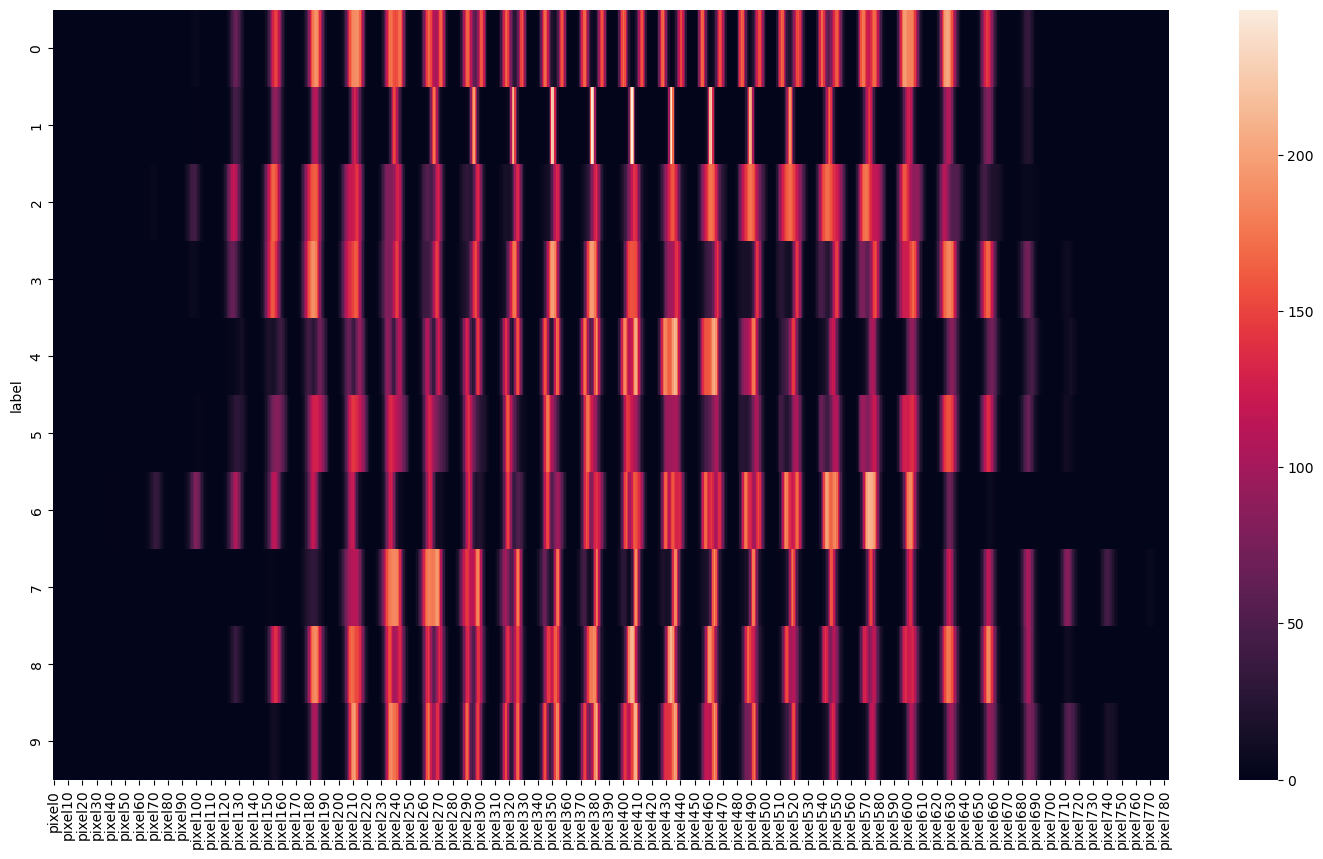

In [45]:
plt.figure(figsize=(18, 10))
sns.heatmap(digit_means)

#### Pixels on the extreme have no corelation which makes sense. Middle pixels have most data nand highest corelation

In [46]:
# average feature values
round(digit_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [47]:
# splitting into X and y
X = digit_data.drop("label", axis = 1)
y = digit_data['label']

In [48]:
# scaling the features
X_scaled = scale(X)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [49]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [50]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9115079365079365 

[[251   0   0   0   0   4   3   0   1   0]
 [  0 269   0   0   0   0   0   0   0   0]
 [  2   3 220   4   6   2   5   1   1   1]
 [  3   2   8 222   0  10   0   2   2   2]
 [  1   2   1   0 218   2   3   5   0   8]
 [  1   1   0   5   2 190   4   1   3   2]
 [  3   1   5   1   0   0 234   0   0   0]
 [  1   1   5   1   2   0   0 266   1  11]
 [  4   7   5  14   1  11   1   2 220   4]
 [  0   1   1   4  17   0   0  12   4 207]]


In [51]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [52]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.930952380952381 

[[251   0   3   0   0   0   1   0   4   0]
 [  0 265   3   0   0   1   0   0   0   0]
 [  2   0 233   1   2   0   4   0   3   0]
 [  0   1  12 224   0   6   1   3   3   1]
 [  2   0   5   0 222   2   3   1   1   4]
 [  0   1   3   2   1 195   7   0   0   0]
 [  2   1   7   0   0   1 233   0   0   0]
 [  0   1  11   0   1   0   0 265   2   8]
 [  2   2   8   4   3   7   1   3 237   2]
 [  0   0   6   4   4   1   0   8   2 221]]


In [53]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [54]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.153627,1.378322,8.466032,0.355706,1,0.01,"{'C': 1, 'gamma': 0.01}",0.703231,0.708333,0.744048,...,0.723810,0.021039,12,1.000000,1.000000,1.000000,1.000000,0.999787,0.999957,0.000085
1,6.852424,0.331829,5.082737,0.196078,1,0.001,"{'C': 1, 'gamma': 0.001}",0.922619,0.920918,0.915816,...,0.921769,0.005641,4,0.964923,0.967262,0.969388,0.966199,0.969175,0.967389,0.001714
2,9.797555,0.480852,83.580569,153.722017,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.906463,0.888605,0.885204,...,0.888946,0.009168,8,0.906250,0.909226,0.907738,0.907526,0.912628,0.908673,0.002191
3,26.863434,0.474282,8.711944,0.232150,10,0.01,"{'C': 10, 'gamma': 0.01}",0.726190,0.733844,0.759354,...,0.742517,0.017677,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,6.216488,0.373694,4.480323,0.233131,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933673,0.931122,0.926871,...,0.935204,0.006661,3,0.998937,0.998724,0.999575,0.998937,0.998937,0.999022,0.000288
5,4.782984,0.470914,4.320725,0.276983,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.936224,0.918367,0.911565,...,0.920578,0.008863,5,0.956420,0.955995,0.959396,0.954507,0.962798,0.957823,0.002951
6,20.402827,7.119457,6.988029,1.909193,100,0.01,"{'C': 100, 'gamma': 0.01}",0.726190,0.733844,0.759354,...,0.742517,0.017677,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,1.949361,0.150466,1.816429,0.065240,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935374,0.929422,0.926871,...,0.935544,0.007689,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,1.308717,0.102236,1.349113,0.086172,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.925170,0.915816,0.908163,...,0.919898,0.008745,6,0.994473,0.994685,0.994473,0.993622,0.993622,0.994175,0.000458
9,8.084727,0.258533,3.341353,0.179018,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.726190,0.733844,0.759354,...,0.742517,0.017677,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


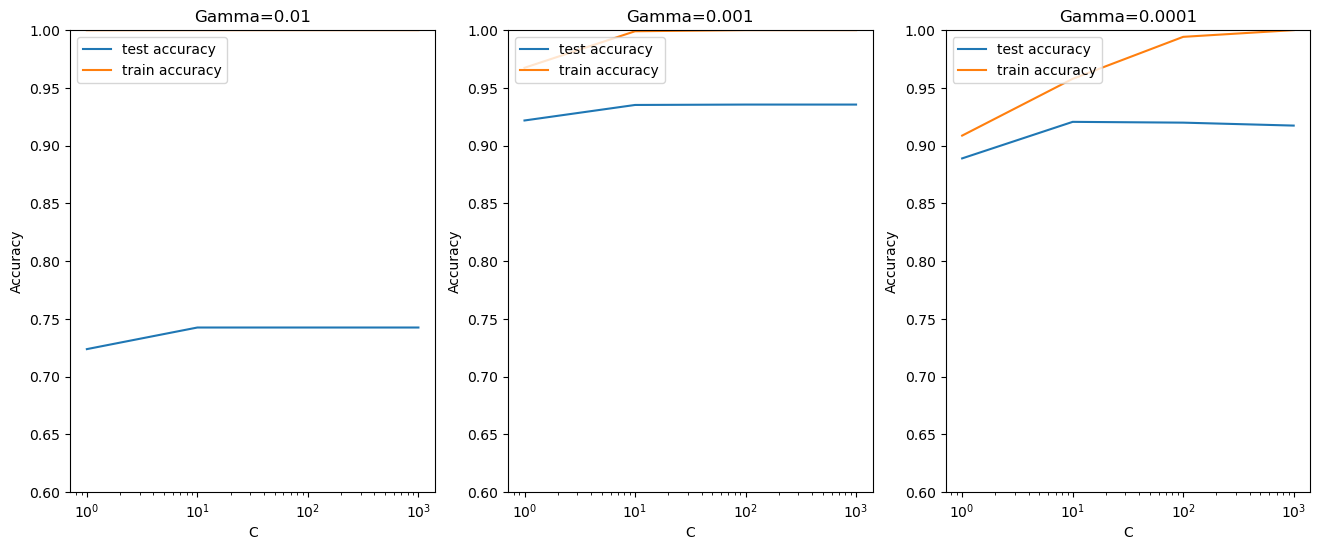

In [55]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [56]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.935544217687075 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


In [57]:
digit_test = pd.read_csv("test.csv")

In [58]:
digit_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
model = SVC(kernel="rbf", C= 100, gamma = 0.001)
model.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [62]:
X_scaled = scale(digit_test)
y_pred = model.predict(X_scaled)

In [63]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [69]:
df = pd.DataFrame()
df["ImageId"] = range(1, len(y_pred)+1)
df.head()

,ImageId
0,1
1,2
2,3
3,4
4,5


In [70]:
df["Label"] = y_pred
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [71]:
df.to_csv('GfG.csv', index = False) 

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

rf.fit(X_train, y_train)

C:\Users\chetna.priyadarshin\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [74]:
rf.oob_score_

0.5202380952380953

In [101]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [103]:
params = {
    'max_depth': [2,3,5,10,20,40,50],
    'min_samples_leaf': [5,10,20,50,100,200],
    'max_features': [100, 200, 300, 400, 500, 600, 700],
    'n_estimators': [10, 25, 50, 100]
}

In [104]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits


In [90]:
grid_search.best_score_

0.9224489795918368

In [91]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [92]:
rf = RandomForestClassifier(random_state=42,max_depth=20, min_samples_leaf=5 ,n_jobs=-1)

In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [97]:
y_pred = rf.predict(digit_test)

C:\Users\chetna.priyadarshin\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [98]:
df = pd.DataFrame()
df["ImageId"] = range(1, len(y_pred)+1)
df.head()

,ImageId
0,1
1,2
2,3
3,4
4,5


In [99]:
df["Label"] = y_pred
df.head()

,ImageId,Label
0,1,2
1,2,8
2,3,8
3,4,8
4,5,8


In [100]:
df.to_csv('rf_digit_predict.csv', index = False) 